In [105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
%autoreload 2


ages = [22,24,25,26,26,27,29,30,31,32,32,32,33,35,36,36,38,38]
edgeFeatures = np.loadtxt('combinedFeaturesForPython.txt', delimiter="\t")
degreeFeatures = np.loadtxt('combinedDegreeFeaturesForPython.txt', delimiter="\t")
print edgeFeatures[12,700]
print np.size(ages)
# plt.imshow(features[:2,:].astype('uint8'),extent=[0,4095,0,18], aspect='auto')




0.0041843
18


(18L, 90L)
(18L, 2L)


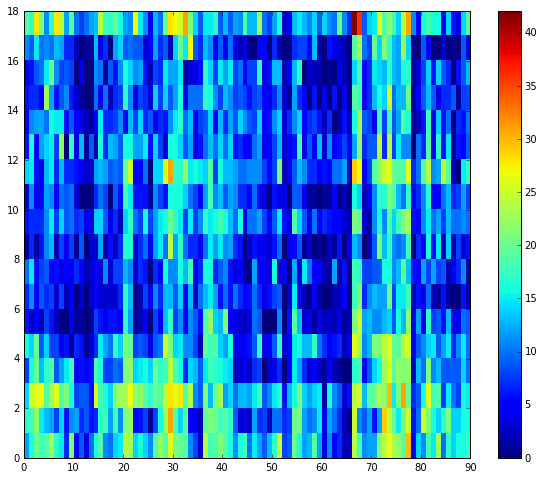

In [106]:
sel = VarianceThreshold(0.01)
thresholdedFeatures = sel.fit_transform(degreeFeatures)
print np.shape(thresholdedFeatures)
X_new = SelectKBest(f_regression, k=2).fit_transform(thresholdedFeatures, ages)
print np.shape(X_new)
plt.imshow(thresholdedFeatures,extent=[0,90,0,18], aspect='auto',vmin=0, vmax=np.max(thresholdedFeatures))
plt.colorbar()

In [107]:
# Stability selection
from sklearn.linear_model import RandomizedLasso
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
 
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(degreeFeatures, ages)
print np.argsort(rlasso.scores_)[-20:]
print np.shape(rlasso.scores_)

[ 1 37 67 46 60 20 53 22 54 89  7 27 47 64 21 38 75 87 79  4]
(90L,)


[68 47 38 21  7 46 25 67  4 79 87 22  1 27 89 54 75 64 29 69 53 20 56 60]
(90L,)
4


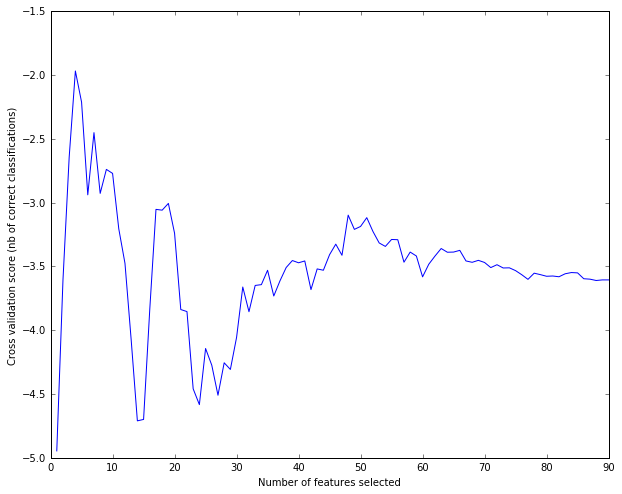

In [125]:
# Recursive feature elimination
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFECV(lr, step=1, cv=17)
rfe.fit(degreeFeatures,ages)
print np.argsort(rfe.ranking_)[:24]
print np.shape(rfe.ranking_)
print rfe.n_features_
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

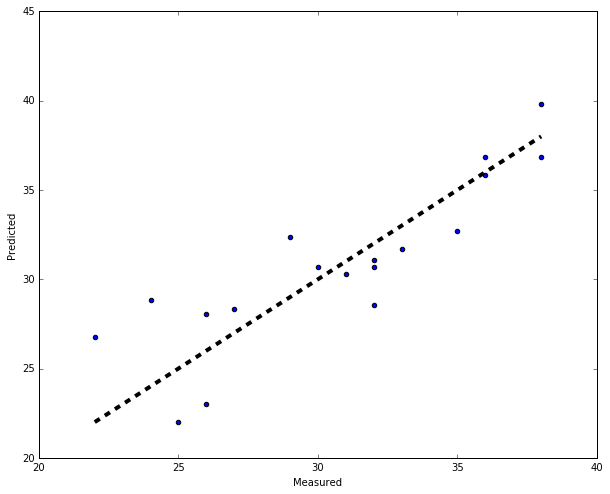

In [130]:
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, degreeFeatures[:,np.argsort(rfe.ranking_)[:rfe.n_features_]],ages, cv=17)

fig, ax = plt.subplots()
ax.scatter(ages, predicted)
ax.plot([np.min(ages), np.max(ages)], [np.min(ages), np.max(ages)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [124]:
#Random forest feature importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(degreeFeatures, ages)
print np.argsort(rf.feature_importances_)[-20:]

[33  5 45 39 29 70  4  1 56 84 44  2 19 23 78 87 79 38 54 20]
